In [1]:
#calling important libraries
import pandas as pd #for data manipulation
import numpy as np #for data manipulation
import matplotlib as plt #for plotting
import os #for ease of python system interaction
import sys
import re
import nltk
nltk.download("stopwords")
import pickle
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#retrieving the data
url = "https://raw.githubusercontent.com/ApollineFo/NPL/main/data/labeled_data.csv"

data = pd.read_csv(url)
#checking the dataset features
data.keys()
data.head()
data = data[data["class"] != 1] #Keep only hateful contents and neither categories

In [5]:
#extracting only tweets as features
features = data.iloc[:,6].values
#extracting labels
classes = data.iloc[:,5].values
features

array(["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
       '" momma said no pussy cats inside my doghouse "',
       '"@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF" woof woof hot scally lad',
       ...,
       "you're such a retard i hope you get type 2 diabetes and die from a sugar rush you fucking faggot @Dare_ILK",
       "you've gone and broke the wrong heart baby, and drove me redneck crazy",
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      dtype=object)

We tried two processings: One was designed by Augustine and one by Apolline




Augustine processing

In [8]:
#preprocessing tweets
processed_features = []
import string 

for sentence in range(0, len(features)):
    #Removing special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    #removing single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    #Removing single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    #Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    #Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    #Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

processed_features
data["processed_features"] = processed_features
data["processed_features"][0]


' rt mayasolovely as woman you shouldn complain about cleaning up your house amp as man you should always take the trash out '

Apolline processing

1. Cleaned tweet

In [39]:

def remove_punct(text):
    #Remove retweets
    RE_TWEET = "RT @[\w]+"
    text = re.sub(RE_TWEET, " ", text)
    #remove @
    text = re.sub('@[\w]+','',text)
    #remove punctions as above
    text  = [char for char in list(text) if char not in string.punctuation]
    text = ''.join(text)
    #remove number
    text = re.sub('[0-9]+', '', text)
    # To lowercase
    text = text.lower()
    # Remove hashtags
    text = re.sub(r'#\w*', ' ', text)
    #remove url
    text = re.sub(r"http\S+", "", text) 
    return text


In [40]:
data['notokens'] = data['tweet'].apply(remove_punct)
data["notokens"][0]

'   as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out'

2. Stopwords removal

In [42]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Idea here: update the stopwords with the slangs?

3. Visualization of our datasets

(-0.5, 399.5, 199.5, -0.5)

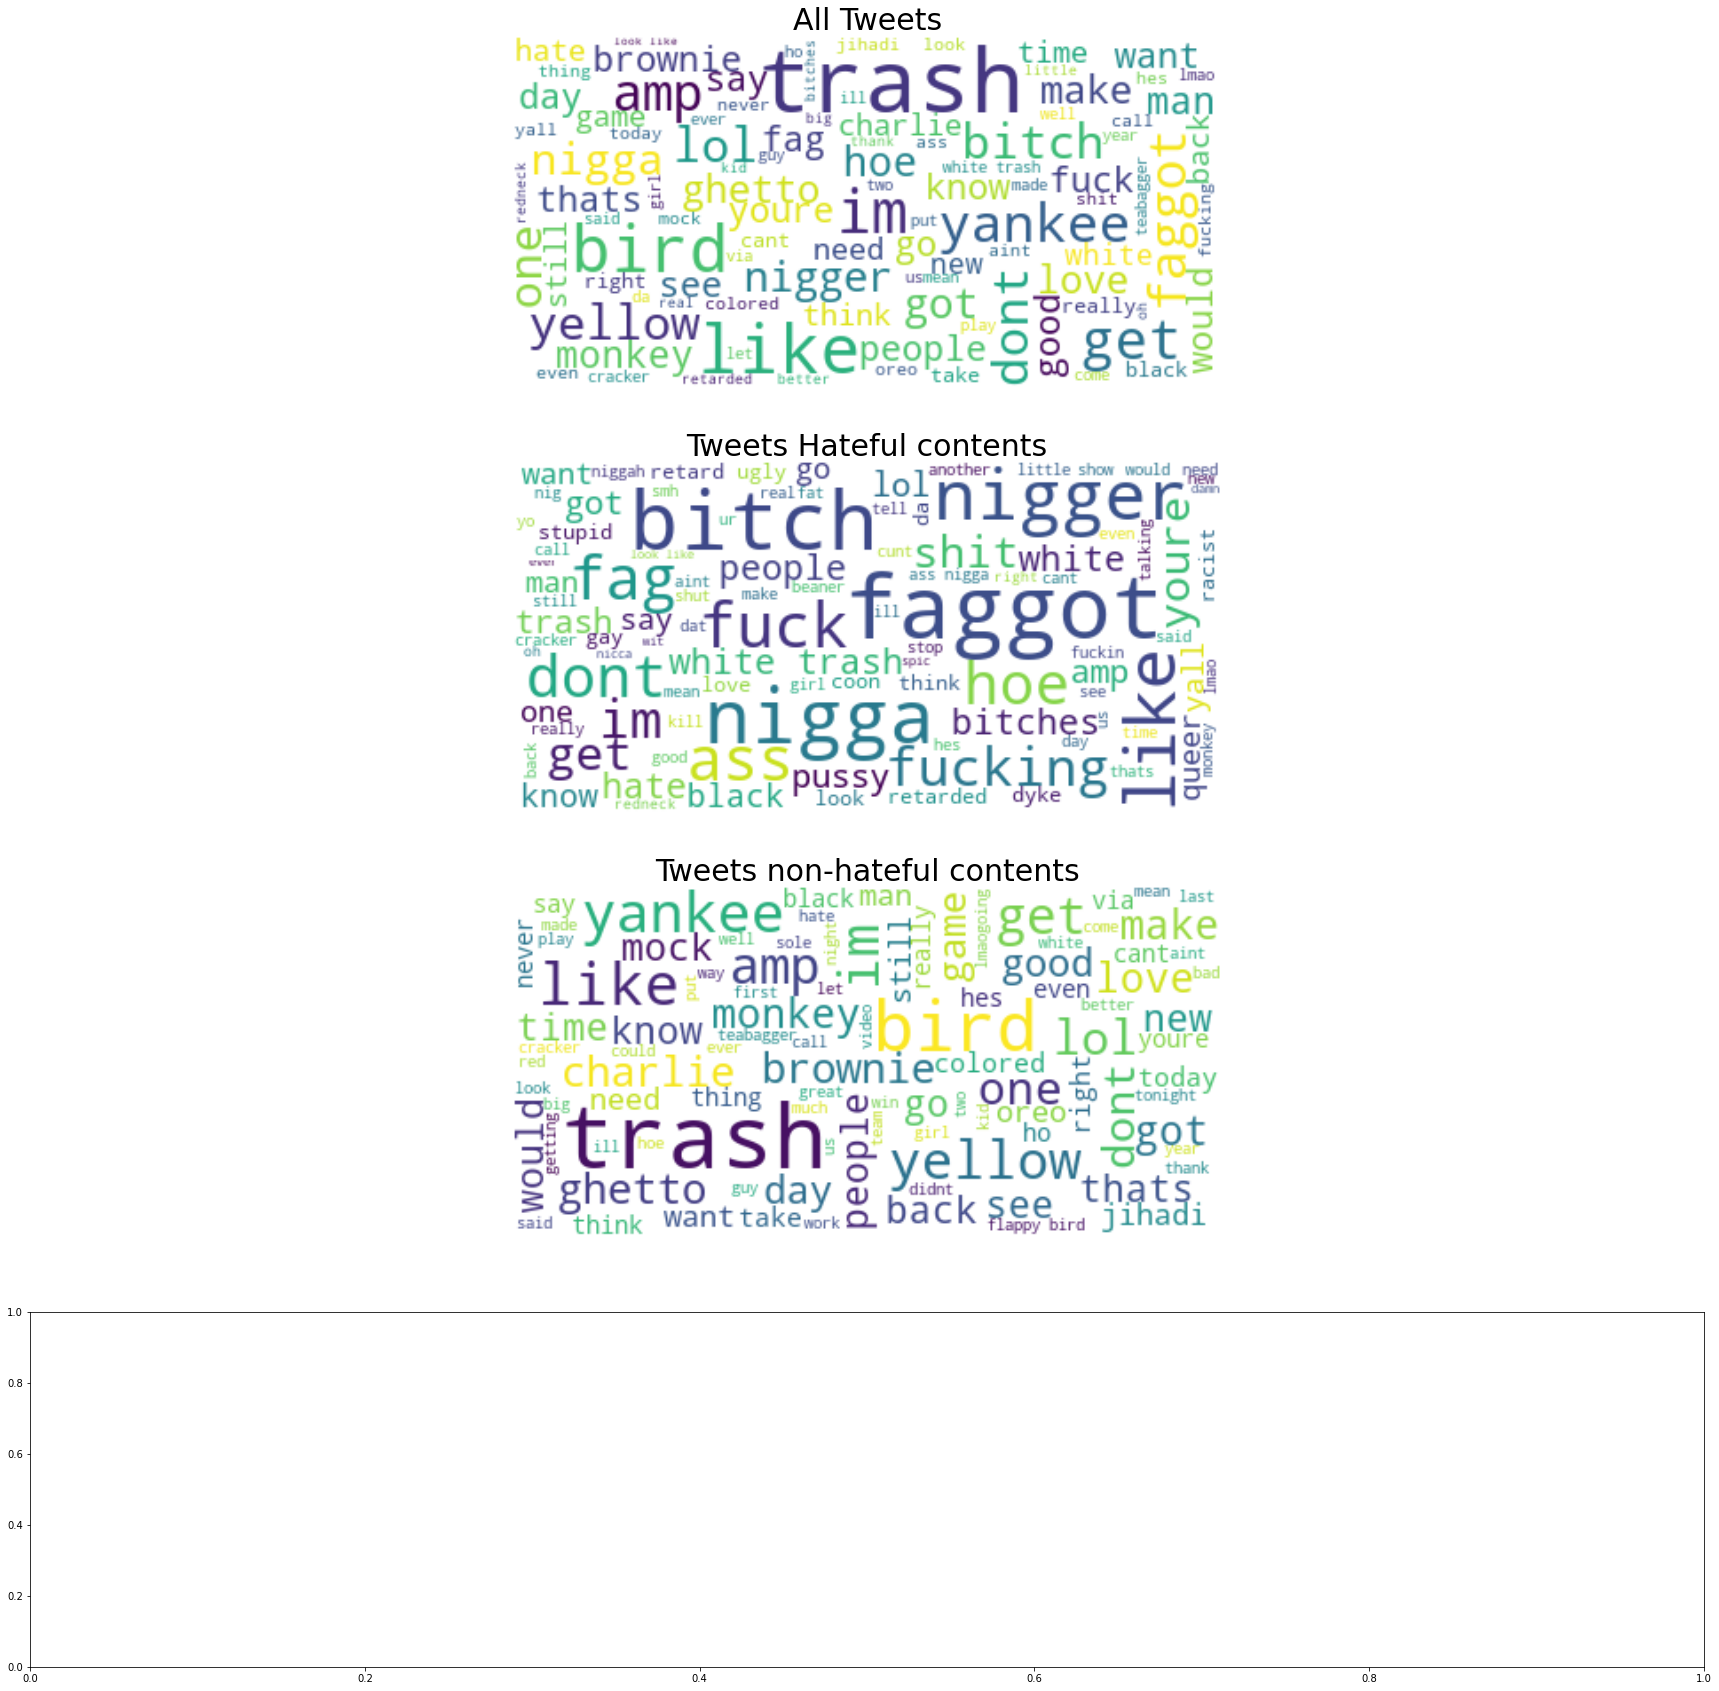

In [43]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

# Start with one review:
data_hateful = data[data['class']==0]
data_nonhateful = data[data['class']==2]
tweet_All = " ".join(review for review in data.notokens)
tweet_hateful = " ".join(review for review in data_hateful.notokens)
tweet_nonhateful = " ".join(review for review in data_nonhateful.notokens)



fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')

4. Tokenization

In [46]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in data["notokens"]:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

data["tokens"] = tweet_tokens
data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
['pop', 'wop', 'and', 'drop', 'it', 'tho']
['we', 'in', 'this', 'bitch', 'finna', 'get', 'crunk', 'eyebrows', 'on', 'double', 'papp']
['is', 'a', 'fag', 'hesgay']
['thats', 'where', 'i', 'saw', 'the', 'leprechaun', 'he', 'told', 'me', 'to', 'burn', 'things']
['you', 'styl', 'gotta', 'get', 'dem', 'tweets', 'off', 'my', 'nig']
['amp', 'als', 'je', 'over', 'syrie', 'tweet', 'volg', 'maar', 'zij', 'komt', 'er', 'vandaan', 'amp', 'zal', 'je', 'precies', 'uitleggen', 'hoe', 'of', 'wat']
['ps', 'and', 'case', 'is', 'still', 'in', 'the', 'trash', 'can', 'idgaf', 'anymore']
['that', 'would', 'cripple', 'our', 'military']
['i', 'didnt', 'think', 'you', 'knew', 'of', 'a', 'bird', 'that', 'couldnt', 'be', 'tamed', 'cajuncharm']
['oh', 'no', 'sorry', 'hun', 'that', 'sucks', 'hope', 'you', 'heal', 'fast', 'dancerproblems']
['no', 'its', 'yellow', 'fin', 'its', 'in', 'edgewater']
['yellow', 'fin']
['ewwww', 'her', 'nips', 

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_features,notokens,tokens
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as woman you shouldn complain...,as a woman you shouldnt complain about clea...,"[as, a, woman, you, shouldnt, complain, about,..."
40,40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """,momma said no pussy cats inside my doghouse,momma said no pussy cats inside my doghouse,"[momma, said, no, pussy, cats, inside, my, dog..."
63,63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",addicted2guys simplyaddictedtoguys http co 1j...,simplyaddictedtoguys woof woof hot scally lad,"[simplyaddictedtoguys, woof, woof, hot, scally..."
66,66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",allaboutmanfeet http co 3gzupfumev woof woof ...,woof woof and hot soles,"[woof, woof, and, hot, soles]"
67,67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",allyhaaaaa lemmie eat oreo amp do these dishe...,lemmie eat a oreo amp do these dishes one ore...,"[lemmie, eat, a, oreo, amp, do, these, dishes,..."
...,...,...,...,...,...,...,...,...,...,...
24767,25280,3,0,1,2,2,"you know what they say, the early bird gets th...",you know what they say the early bird gets the...,you know what they say the early bird gets the...,"[you, know, what, they, say, the, early, bird,..."
24776,25289,3,3,0,0,0,you're all niggers,you re all niggers,youre all niggers,"[youre, all, niggers]"
24777,25290,3,2,1,0,0,you're such a retard i hope you get type 2 dia...,you re such retard hope you get type 2 diabete...,youre such a retard i hope you get type diabe...,"[youre, such, a, retard, i, hope, you, get, ty..."
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...,youve gone and broke the wrong heart baby and ...,"[youve, gone, and, broke, the, wrong, heart, b..."


In [59]:
from nltk.corpus import stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
nltk_words

data["tokens_stopwords"] = [w for w in data["tokens"] if not w in nltk_words]
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_features,notokens,tokens,tokens_stopwords
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as woman you shouldn complain...,as a woman you shouldnt complain about clea...,"[as, a, woman, you, shouldnt, complain, about,...","[as, a, woman, you, shouldnt, complain, about,..."
40,40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """,momma said no pussy cats inside my doghouse,momma said no pussy cats inside my doghouse,"[momma, said, no, pussy, cats, inside, my, dog...","[momma, said, no, pussy, cats, inside, my, dog..."
63,63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",addicted2guys simplyaddictedtoguys http co 1j...,simplyaddictedtoguys woof woof hot scally lad,"[simplyaddictedtoguys, woof, woof, hot, scally...","[simplyaddictedtoguys, woof, woof, hot, scally..."
66,66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",allaboutmanfeet http co 3gzupfumev woof woof ...,woof woof and hot soles,"[woof, woof, and, hot, soles]","[woof, woof, and, hot, soles]"
67,67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",allyhaaaaa lemmie eat oreo amp do these dishe...,lemmie eat a oreo amp do these dishes one ore...,"[lemmie, eat, a, oreo, amp, do, these, dishes,...","[lemmie, eat, a, oreo, amp, do, these, dishes,..."
...,...,...,...,...,...,...,...,...,...,...,...
24767,25280,3,0,1,2,2,"you know what they say, the early bird gets th...",you know what they say the early bird gets the...,you know what they say the early bird gets the...,"[you, know, what, they, say, the, early, bird,...","[you, know, what, they, say, the, early, bird,..."
24776,25289,3,3,0,0,0,you're all niggers,you re all niggers,youre all niggers,"[youre, all, niggers]","[youre, all, niggers]"
24777,25290,3,2,1,0,0,you're such a retard i hope you get type 2 dia...,you re such retard hope you get type 2 diabete...,youre such a retard i hope you get type diabe...,"[youre, such, a, retard, i, hope, you, get, ty...","[youre, such, a, retard, i, hope, you, get, ty..."
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...,youve gone and broke the wrong heart baby and ...,"[youve, gone, and, broke, the, wrong, heart, b...","[youve, gone, and, broke, the, wrong, heart, b..."


Models

In [ ]:
#specifying parameters
parameters = [
    {
    'vect__max_df': (0.9,), #ignore terms with frequency higher than aforementioned
        'vect__min_df': (2,), #ignore lower frequencies than aforementioned
        'vect__ngram_range': ((1, 1),), #only unigrams
        'clf__estimator__kernel': ['rbf'], #gausian kernel
    'clf__estimator__gamma': [1e0,], #a gamma of zero
        'clf__estimator__C': [1,],
        'clf__estimator__class_weight': [None, "balanced"] #balanced weight
    },
    {
        'vect__max_df': (0.9,),
        'vect__min_df': (2,),
        'vect__ngram_range': ((1, 1),),
        'clf__estimator__kernel': ['linear'], #linear kernel
    'clf__estimator__C': [1,]
    }
]

In [ ]:
# building a pipeline
pipeline = Pipeline([('vect', TfidfVectorizer(parameters)),                     
    ('clf', OneVsRestClassifier(SVC(probability=True))),
])

In [ ]:
#splitting the dataset to trian and test set
#80 percent of data for training, 20 percent for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, classes, test_size=0.2, random_state=42)

In [ ]:
#grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [ ]:
#fitting the classifier
classifier = grid_search.fit(X_train, y_train)

#predicting
y_predict = classifier.predict(X_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[  51  198   41]
 [  38 3678  116]
 [   4   86  745]]
              precision    recall  f1-score   support

           0       0.55      0.18      0.27       290
           1       0.93      0.96      0.94      3832
           2       0.83      0.89      0.86       835

    accuracy                           0.90      4957
   macro avg       0.77      0.68      0.69      4957
weighted avg       0.89      0.90      0.89      4957



In [ ]:
#evaluating the model with ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class="ovr")

#with a higher score than 0.5, signifies that our model is useful.

0.630180719651229

In [ ]:
#evaluating the model using cross validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

#returning accuracies of the folds
print(all_accuracies)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.2s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.1s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.2s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.0s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.1s finished


[0.56880734 0.56880734 0.58715596 0.55963303 0.56481481]


In [ ]:
#printing standard deviation of accuracies
print(all_accuracies.std())

#earning a low variance meaning; a good indicator that the model will perform similar on all test sets and the prediction obtained is not by chance

0.00928881117995757


Model by Apolline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["processed_features"], data['class'], test_size=0.2)

In [ ]:
#create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(stopword=stop_words)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  SVC(kernel = 'rbf')),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2),(1,3)],
              'tfidf__use_idf': (True, False),
             }
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=5, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished



Best Model: 0.906126 using {'bow__ngram_range': (1, 1), 'tfidf__use_idf': True}


Mean: 0.906126 Stdev:(0.008467) with: {'bow__ngram_range': (1, 1), 'tfidf__use_idf': True}
Mean: 0.906125 Stdev:(0.005091) with: {'bow__ngram_range': (1, 1), 'tfidf__use_idf': False}
Mean: 0.891598 Stdev:(0.008245) with: {'bow__ngram_range': (1, 2), 'tfidf__use_idf': True}
Mean: 0.902549 Stdev:(0.006888) with: {'bow__ngram_range': (1, 2), 'tfidf__use_idf': False}
Mean: 0.877740 Stdev:(0.008384) with: {'bow__ngram_range': (1, 3), 'tfidf__use_idf': True}
Mean: 0.897409 Stdev:(0.006806) with: {'bow__ngram_range': (1, 3), 'tfidf__use_idf': False}
